KÜTÜPHANELERİN YÜKLENMESİ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split

DATA EKLEMESİ

In [2]:
# read dataframe
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


KEŞİFÇİ VERİ ANALİZİ ve VERİ ÖN İŞLEME

In [3]:
# ÖNEMSİZ KOLONLARIN ÇIKARTILMASI 
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [5]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


VERİ GÖRSELLEŞTİRME

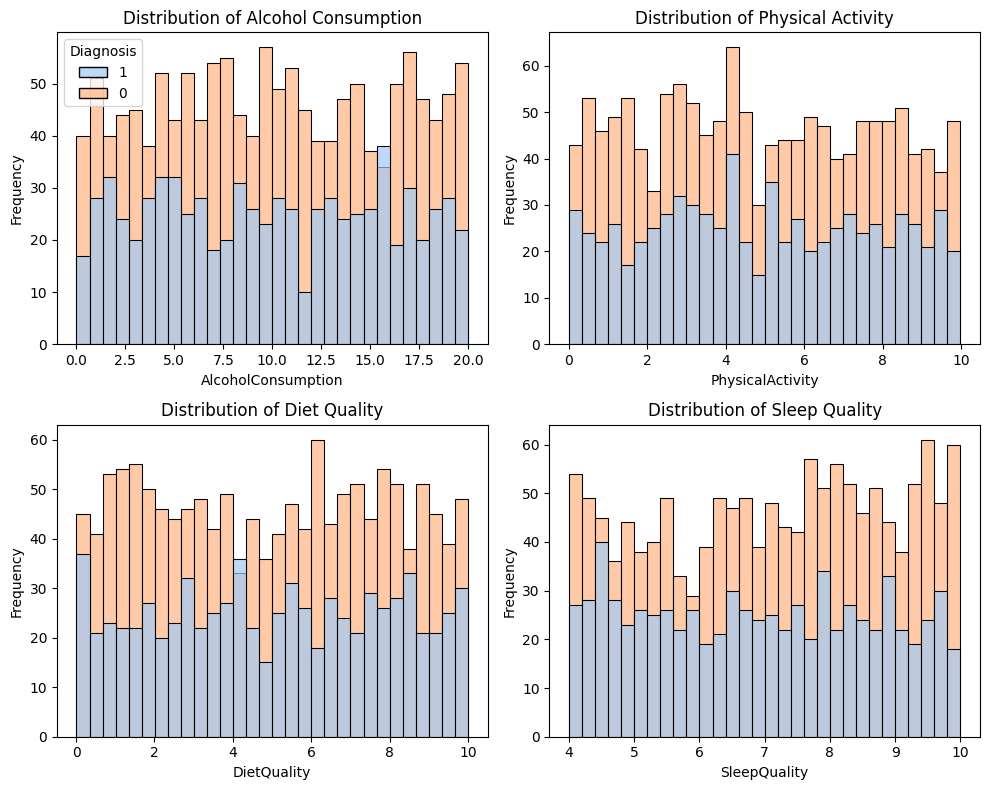

In [6]:
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

hue_order = [1, 0]  # Adjust the order here

# Plotting each histogram with additional features
sns.histplot(ax=axes[0, 0], x='AlcoholConsumption', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of Alcohol Consumption')
axes[0, 0].set_xlabel('AlcoholConsumption')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='PhysicalActivity', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Physical Activity')
axes[0, 1].set_xlabel('PhysicalActivity')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='DietQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Diet Quality')
axes[1, 0].set_xlabel('DietQuality')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='SleepQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Sleep Quality')
axes[1, 1].set_xlabel('SleepQuality')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Yukarıdaki histogramlar, bu veri setindeki hastaların çeşitli yaşam tarzı alışkanlıklarının dağılımını göstermektedir. Tüm değişkenler, benzer dağılım şekilleri ve değişken aralığı boyunca benzer teşhis aralıkları sergilemektedir.

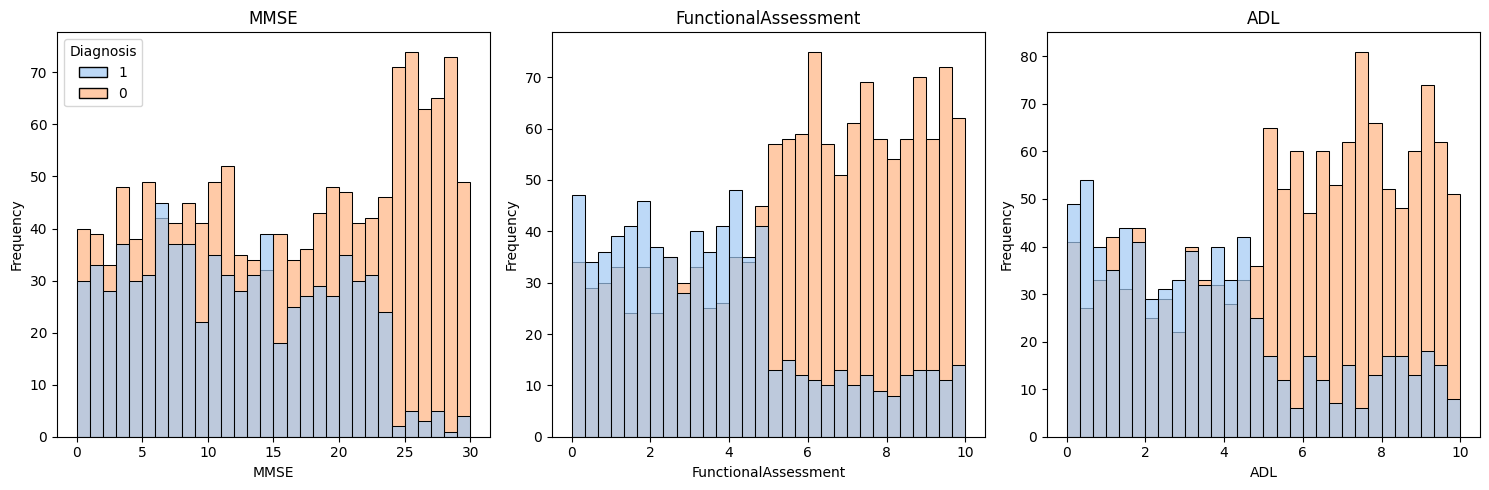

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each histogram with additional features
sns.histplot(ax=axes[0], x='MMSE', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='MMSE')
axes[0].set_xlabel('MMSE')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], x='FunctionalAssessment', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='FunctionalAssessment')
axes[1].set_xlabel('FunctionalAssessment')
axes[1].set_ylabel('Frequency')

sns.histplot(ax=axes[2], x='ADL', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='ADL')
axes[2].set_xlabel('ADL')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Soldaki histogram, Mini Mental Durum Değerlendirme (MMSE) skorunun dağılımını göstermektedir. Alzheimer teşhisi konulan hastaların çok azı 25'in üzerinde bir skor almıştır. Düşük skorlar bilişsel bozukluğu gösterdiğinden, pozitif teşhis alan hastaların MMSE'de yüksek puan alma olasılığı daha düşüktür.

Ortadaki histogram, Fonksiyonel Değerlendirme skorunun dağılımını göstermektedir. MMSE grafiğine benzer şekilde, düşük skorlar daha büyük bir bozulmayı ifade eder. Pozitif vaka dağılımı sağa çarpık bir yapı gösterirken, negatif vaka dağılımı sola çarpık bir yapı sergilemektedir. Bu durum, pozitif teşhis alan hastaların daha fazla işlevsel bozukluk gösterdiğini ortaya koymaktadır.

Sağdaki histogram, Günlük Yaşam Aktiviteleri (ADL) skorunun dağılımını göstermektedir. Önceki grafiklere benzer şekilde, düşük skorlar daha büyük bir bozulmayı ifade eder. Pozitif vaka dağılımı sağa çarpık bir yapı gösterirken, negatif vaka dağılımı sola çarpık bir yapı sergilemektedir. Bu durum, pozitif teşhis alan hastaların daha fazla bozulma gösterdiğini ortaya koymaktadır.

**KISACA GRAFİKLERİ YORUMLAMAK GEREKİRSE MİNİ MENTAL DEĞERLENDİRME SKORU VE FONKSİYONEL DEĞERLENDİRME SKORU VE GÜNLÜK YAŞAM AKTİVİTESİ SKORU  ALZAYMIR TEŞHİSİ İÇİN BELİRGİN BİR ROL OYNUYOR **

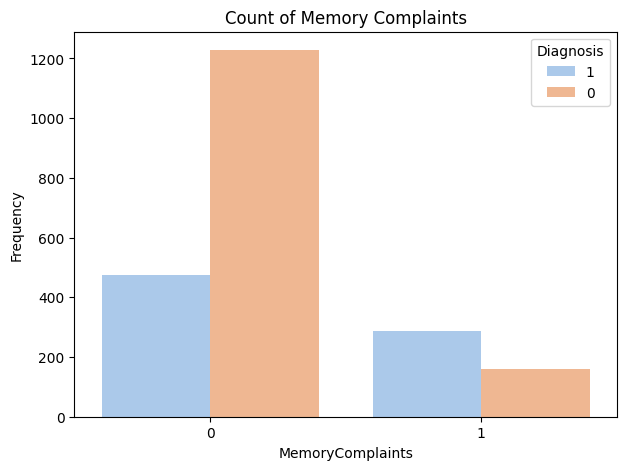

In [8]:
fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='MemoryComplaints', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Memory Complaints')
plt.xlabel('MemoryComplaints')
plt.ylabel('Frequency')
plt.show()

Yukarıdaki countplot grafiğinde, Alzheimer teşhisi konulan hastaların, teşhis konulmayan hastalara göre daha fazla hafıza şikayetinde bulunduğu görülmektedir.

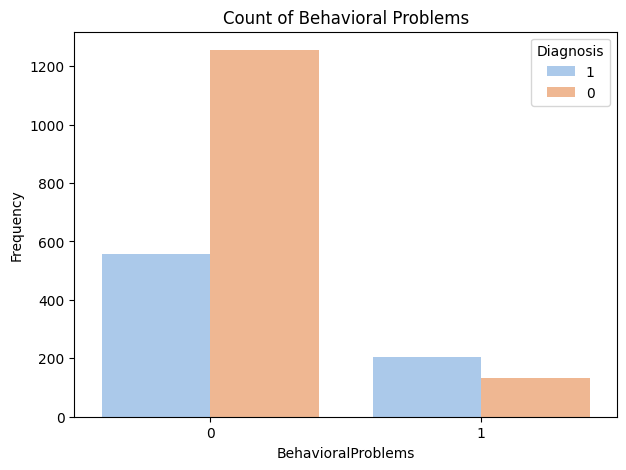

In [9]:
fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='BehavioralProblems', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Behavioral Problems')
plt.xlabel('BehavioralProblems')
plt.ylabel('Frequency')
plt.show()

Yukarıdaki countplot grafiğinde, Alzheimer teşhisi konulan hastaların, teşhis konulmayan hastalara göre daha fazla hafıza şikayetinde bulunduğu görülmektedir.

RANDOM FOREST CLASSIFICATION ALGORİTMASI İLE MODEL OLUŞTURMA

In [14]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming `df` is defined and contains the dataset
x = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

rf_accuracy = []
rf_cv_score = []
rf_imp = []

## Running 5 times CV
for i in range(5):
    print('Loop:', i + 1)
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    for train_ix, test_ix in skf.split(x, y):
        
        ## Splitting the data 
        x_train, x_test = x.iloc[train_ix], x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
        ## Building RF model ##
        rf_md = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42).fit(x_train, y_train)
        # extracting feature importances
        rf_imp.append(rf_md.feature_importances_)
        ## Predicting on test
        rf_pred = rf_md.predict(x_test)
        
        ## Computing metrics
        rf_accuracy.append(accuracy_score(y_test, rf_pred))
        
        ## Computing confusion matrix
        cm = confusion_matrix(y_test, rf_pred)
        cm_df = pd.DataFrame(cm, 
                             index=[f'Actual_{cls}' for cls in np.unique(y)],
                             columns=[f'Predicted_{cls}' for cls in np.unique(y)])
        
        print('Confusion Matrix:')
        print(cm_df)
        print('\n')

rf_cv_score = np.mean(rf_accuracy)

print('The accuracy score of the RF model over 5-folds (run 5 times) is:', rf_cv_score)


Loop: 1
Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          273            5
Actual_1           40          112


Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          272            6
Actual_1           42          110


Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          276            2
Actual_1           55           97


Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          273            5
Actual_1           50          102


Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          271            6
Actual_1           38          114


Loop: 2
Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          273            5
Actual_1           40          112


Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          272            6
Actual_1           42          110


Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0          276            2
Actual_1           55

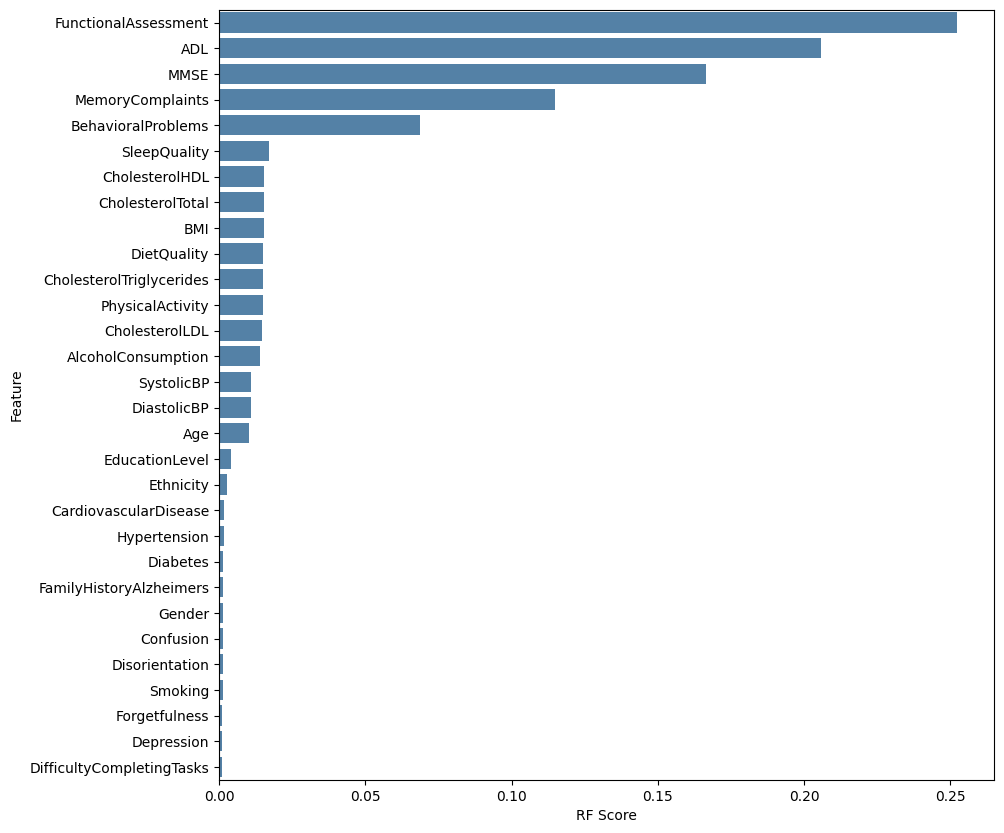

In [18]:
# Plotting importances
dat = pd.DataFrame(pd.DataFrame(rf_imp, columns = x.columns).apply(np.mean, axis = 0))
dat['Feature'] = dat.index
dat.columns = ['RF Score', 'Feature']
dat.reset_index(drop = True, inplace = True)
dat.sort_values(by = 'RF Score', ascending = False, inplace = True)
dat = dat[dat['RF Score'] > 0.001]

fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(data = dat, x = 'RF Score', y = 'Feature', color = 'steelblue')
plt.show()

Yukarıdaki grafik, model üzerinde etkisi sıralanmış şekilde Random Forest önem derecelerini göstermektedir. İlk 5 önemli özelliğin, keşif analizimizde ele aldığımız değişkenler olduğunu fark edebilirsiniz. Bu durum, Alzheimer teşhisinde etkili olan değişkenlere ilişkin grafiklere bakarak yaptığımız ilk varsayımların doğru olduğunu göstermektedir.